In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks
from scipy.linalg import svd

In [2]:
pulses = pd.read_excel('pulses.xlsx', dtype=np.float)

timecol = 'Time (s)'

largest_freq = 'f = 2.0 THz'

# extract time colums and delet it
times = pulses[timecol].to_numpy()
pulses.drop(columns=[timecol], inplace=True)

# scale the fileds to maximum
field_ampl = pulses.abs().max().max()
pulses /= field_ampl

pulses.columns

Index(['f=0.4 THz', 'f = 0.5 THz', 'f = 0.6 THz', 'f = 0.7 THz', 'f = 0.8 THz',
       'f = 0.9 THz', 'f = 1.0 THz', 'f = 1.1 THz', 'f = 1.2 THz',
       'f = 2.0 THz'],
      dtype='object')

In [3]:
def plot_pulses(df):
    """
    Plot pulses saved in DataFrame dt
    """
    for colname in df.columns:        
        plt.plot(df[colname], label=colname)

    plt.ylabel('Nomrlized electric field')
    plt.xlabel(timecol)
    plt.legend()
    plt.show()

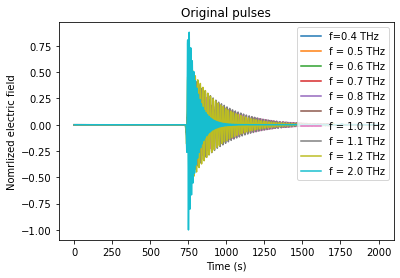

In [4]:
plt.title('Original pulses')
plot_pulses(pulses)

In [5]:
# For the highest frequency field, find the position (time index) of the largest peak
# and the peak before and after that.

# Define the observational time window to be the period containing the largest peak

largest_peak = np.argmax(pulses[largest_freq].abs())
peaks = find_peaks(pulses[largest_freq].abs())[0]

peak_before_largest = peaks[peaks < largest_peak].max()
peak_after_largest = peaks[peaks > largest_peak].min()

observational_window = peak_after_largest - peak_before_largest

In [6]:
# Temporally shift pulses such that their beaks are aligned

# Additional offset is introduced such that 
# the observational time windows starts at time index 0

add_offset = largest_peak - peak_before_largest

for colname in pulses.columns:
    filed = pulses[colname]
    pulses[colname] = np.roll(filed, -np.argmax(filed.abs()) + add_offset)

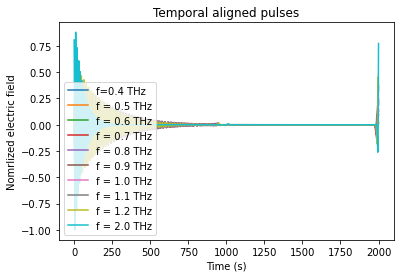

In [7]:
plt.title('Temporal aligned pulses')
plot_pulses(pulses)

In [8]:
U, sigmas, Vh = svd(pulses[:observational_window], full_matrices=False)

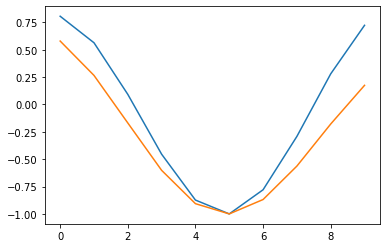

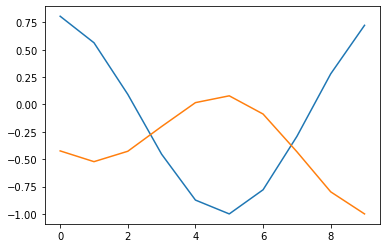

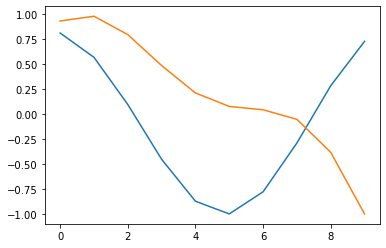

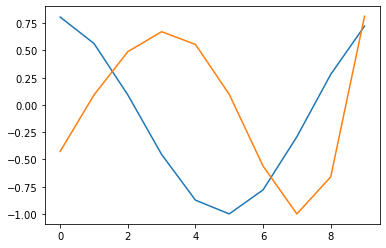

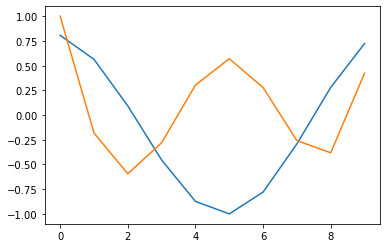

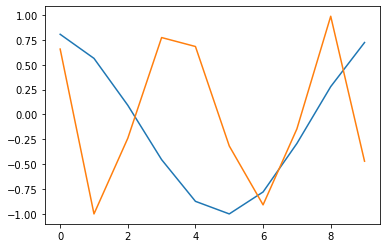

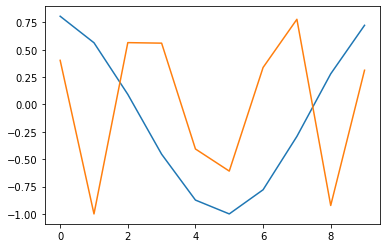

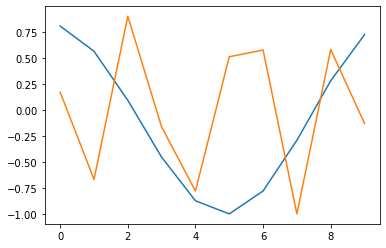

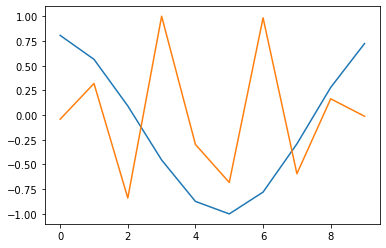

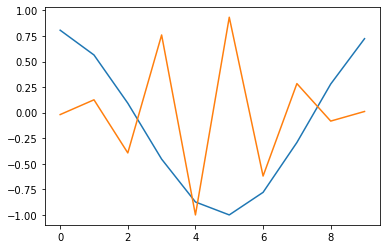

In [9]:
largest_freq_pulse = pulses[largest_freq][:observational_window]
largest_freq_pulse /= largest_freq_pulse.abs().max()

for singular_vector in Vh:
    
    field = pulses @ singular_vector
    
        
    plt.plot(largest_freq_pulse)
    plt.plot(field[:observational_window] / field[:observational_window].abs().max())
    plt.show()

In [10]:
len(pulses.columns)

10